In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
#reading the file
file = "water_quality_measurments.csv"

try:
    data = pd.read_csv(file)
except Exception:
    print("File not found, there is an error loading the file")


In [4]:
data.describe()

,%time,field.header.seq,field.header.stamp,field.stamp_sonde,field.temp_c,field.spcond_u,field.sal,field.ph,field.orp,field.depth_m,field.turbidity_ntu,field.turbidity_fnu,field.odo_percsat,field.odo_m,field.latitude,field.longitude
count,4.514000e+03,4514.000000,4.514000e+03,4.514000e+03,4514.000000,4514.000000,4.514000e+03,4514.000000,4514.000000,4514.000000,4514.000000,4514.000000,4514.000000,4514.000000,4514.000000,4514.000000
mean,9.120974e+17,4260.147541,9.120974e+17,1.531416e+18,24.844907,75.127277,3.000000e-02,10.198828,141.206852,-0.098586,0.792616,0.792621,109.778855,9.096637,45.544451,-73.151941
std,1.308296e+12,1304.918318,1.308296e+12,1.308311e+12,0.141369,0.086270,3.469831e-18,0.041762,7.929664,0.001951,0.036739,0.036734,0.362705,0.041569,0.000514,0.000952
min,9.120951e+17,2002.000000,9.120951e+17,1.531414e+18,24.576000,74.739998,3.000000e-02,10.120000,125.080002,-0.103000,0.700000,0.700000,109.000000,9.010000,45.543610,-73.153572
25%,9.120963e+17,3130.250000,9.120963e+17,1.531415e+18,24.737000,75.080002,3.000000e-02,10.170000,134.222500,-0.100000,0.770000,0.770000,109.519997,9.060000,45.543991,-73.152817
50%,9.120974e+17,4259.500000,9.120974e+17,1.531416e+18,24.825001,75.129997,3.000000e-02,10.200000,141.985001,-0.099000,0.790000,0.790000,109.750000,9.090000,45.544453,-73.151981
75%,9.120985e+17,5389.750000,9.120985e+17,1.531417e+18,24.931000,75.180000,3.000000e-02,10.240000,149.167500,-0.097000,0.820000,0.820000,110.059998,9.130000,45.544914,-73.151108
max,9.120997e+17,6520.000000,9.120997e+17,1.531419e+18,25.204000,75.550003,3.000000e-02,10.270000,152.460007,-0.094000,0.930000,0.930000,110.529999,9.180000,45.545280,-73.150368


In [5]:
data.dtypes

%time                  float64
field.header.seq         int64
field.header.stamp     float64
field.stamp_sonde      float64
field.temp_c           float64
field.spcond_u         float64
field.sal              float64
field.ph               float64
field.orp              float64
field.depth_m          float64
field.turbidity_ntu    float64
field.turbidity_fnu    float64
field.odo_percsat      float64
field.odo_m            float64
field.latitude         float64
field.longitude        float64
dtype: object

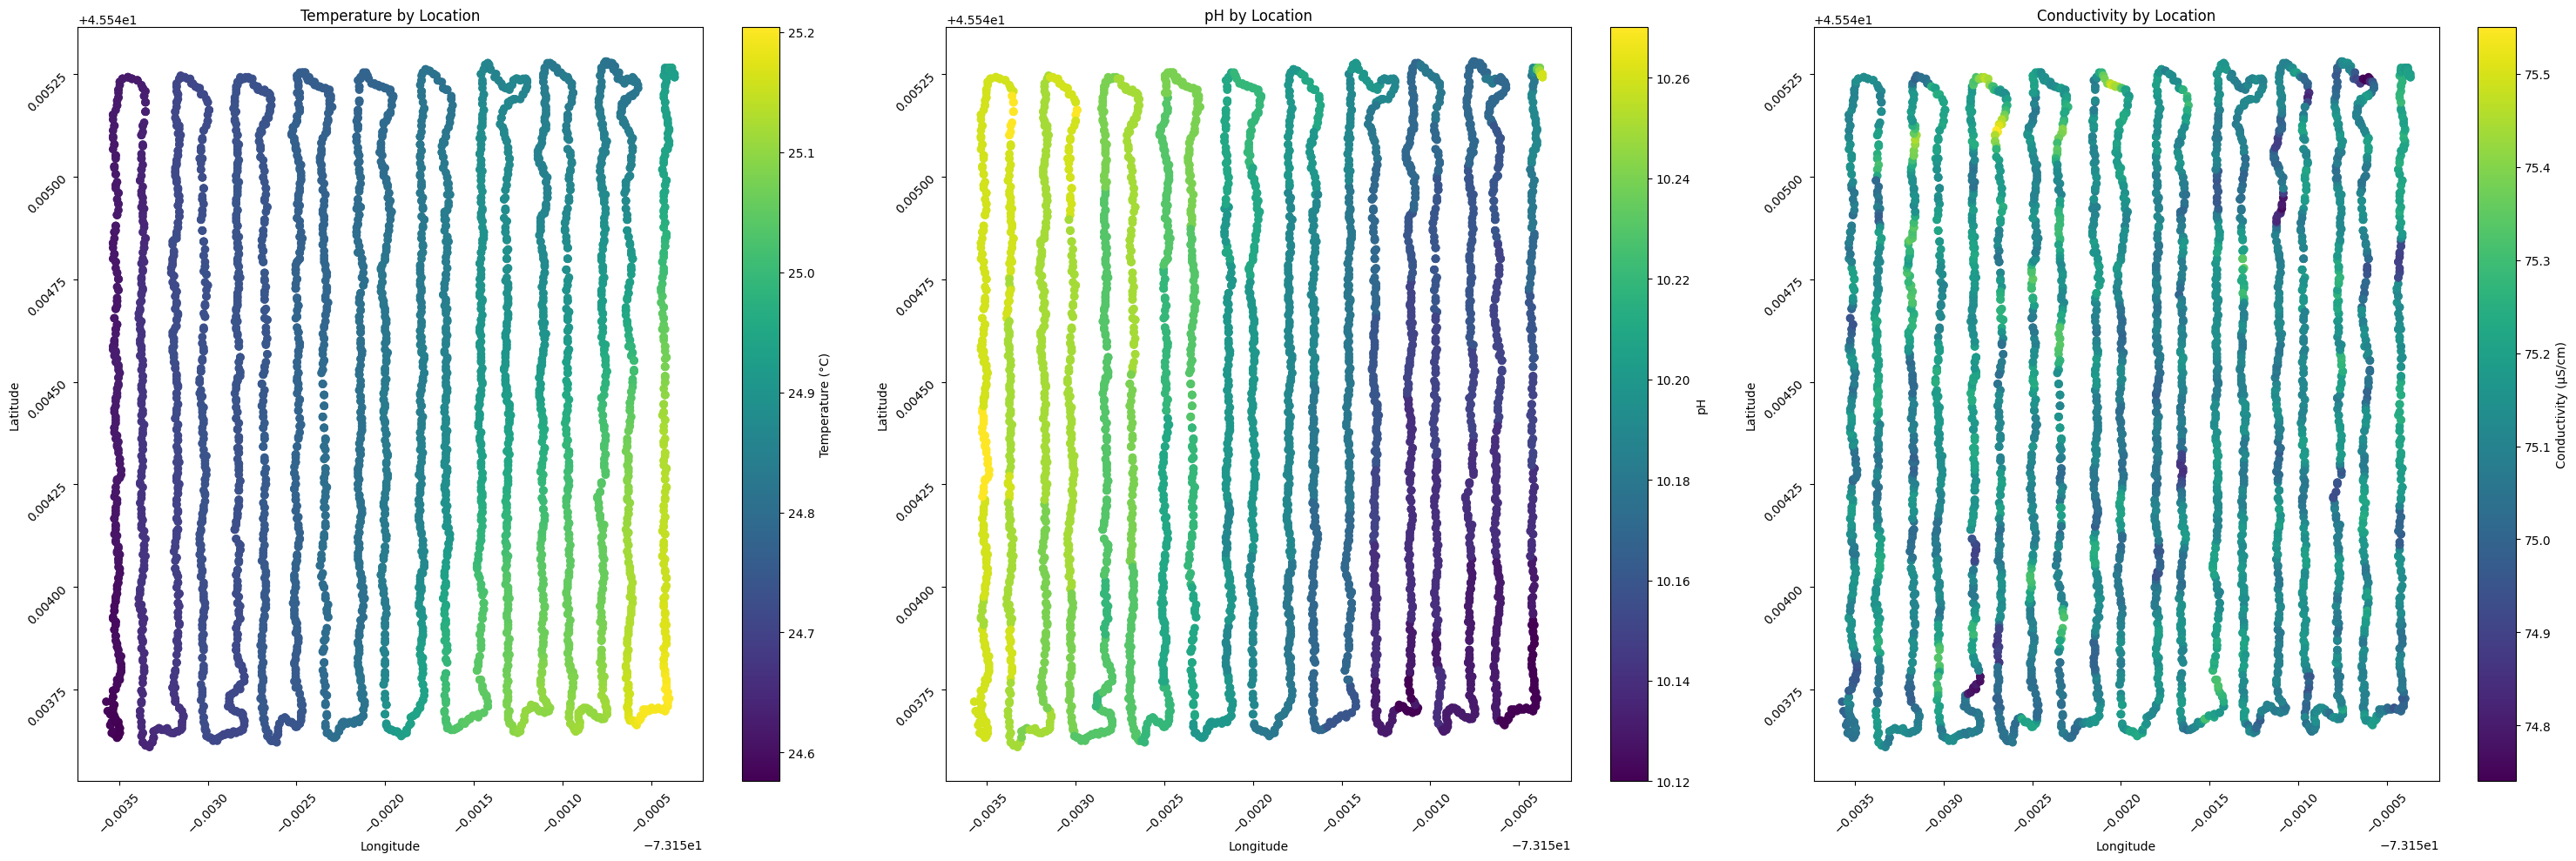

In [6]:
#QUESTION1
temperature = data['field.temp_c']
pH = data['field.ph']
conductivity = data['field.spcond_u']

#storing the data in the diffferent well explained variable.
temperature = data['field.temp_c']
pH = data['field.ph']
conductivity = data['field.spcond_u']
latitude = data['field.latitude']
longitude = data['field.longitude']

#create a subplot for all the images
fig, axs = plt.subplots(1, 3, figsize=(30, 10))

# Temperature by Location
scatter_temp = axs[0].scatter(
    longitude, latitude, c=temperature, cmap='viridis')
fig.colorbar(scatter_temp, ax=axs[0], label='Temperature (°C)')
axs[0].set_xlabel('Longitude')
axs[0].set_ylabel('Latitude')
axs[0].set_title('Temperature by Location')

# pH by Location
scatter_ph = axs[1].scatter(longitude, latitude, c=pH, cmap='viridis')
fig.colorbar(scatter_ph, ax=axs[1], label='pH')
axs[1].set_xlabel('Longitude')
axs[1].set_ylabel('Latitude')
axs[1].set_title('pH by Location')

# Conductivity by Location
scatter_cond = axs[2].scatter(
    longitude, latitude, c=conductivity, cmap='viridis')
fig.colorbar(scatter_cond, ax=axs[2], label='Conductivity (μS/cm)')
axs[2].set_xlabel('Longitude')
axs[2].set_ylabel('Latitude')
axs[2].set_title('Conductivity by Location')

# Rotate tick labels for readability
for ax in axs:
    ax.tick_params(axis='x', rotation=45)
    ax.tick_params(axis='y', rotation=45)

plt.tight_layout()

# Show the plot
plt.show()

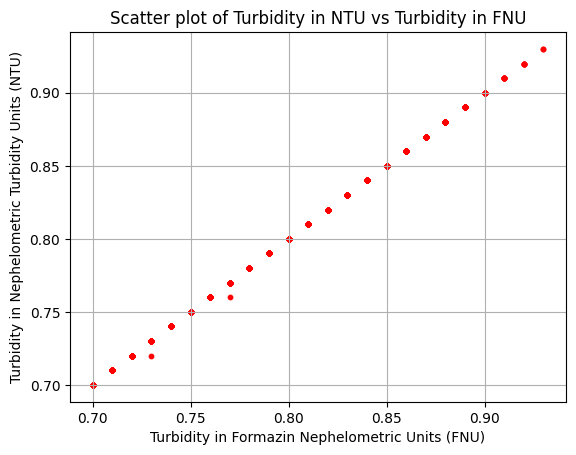

<Figure size 1500x1000 with 0 Axes>

In [7]:

# Question2
def scatter_plot(x_data, y_data, x_label, y_label, title):
    plt.scatter(x_data, y_data, color="red", s=10)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.grid(True)
    plt.figure(figsize=(15, 10))
    plt.tight_layout()
    plt.show()
turbidity_ntu = data["field.turbidity_ntu"]
turbidity_nfu = data["field.turbidity_fnu"]
scatter_plot(turbidity_nfu, turbidity_ntu,
            "Turbidity in Formazin Nephelometric Units (FNU)",
            "Turbidity in Nephelometric Turbidity Units (NTU)",
            "Scatter plot of Turbidity in NTU vs Turbidity in FNU")

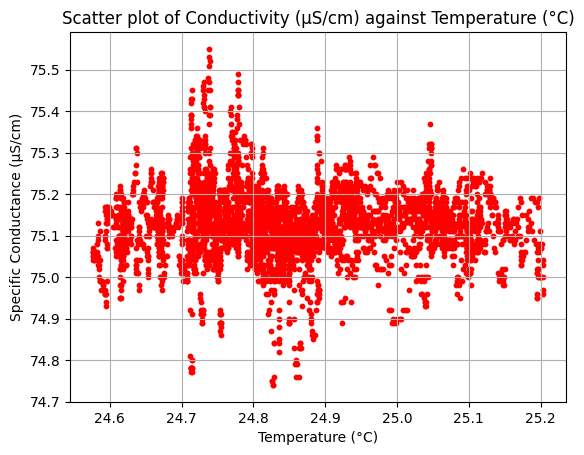

<Figure size 1500x1000 with 0 Axes>

In [8]:
#Question 
scatter_plot(temperature, conductivity,
             "Temperature (°C)",
             "Specific Conductance (μS/cm)",
             "Scatter plot of Conductivity (μS/cm) against Temperature (°C)")

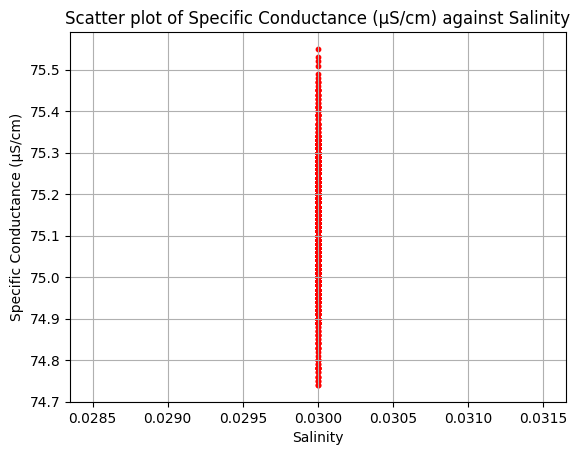

<Figure size 1500x1000 with 0 Axes>

In [9]:
salinity = data["field.sal"]
scatter_plot(salinity, conductivity,
             "Salinity",
             "Specific Conductance (μS/cm)",
             "Scatter plot of Specific Conductance (μS/cm) against Salinity")

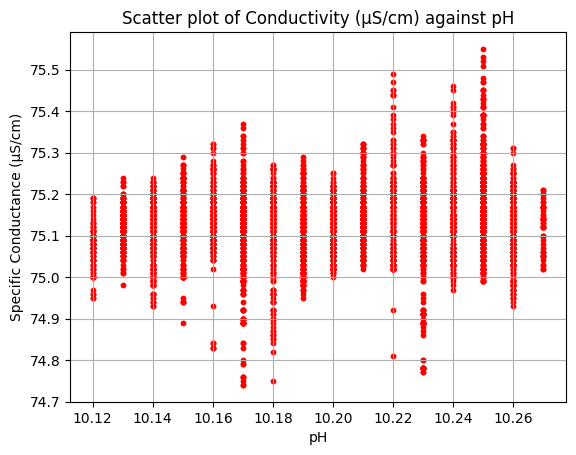

<Figure size 1500x1000 with 0 Axes>

In [10]:
scatter_plot(pH, conductivity,
             "pH",
             "Specific Conductance (μS/cm)",
             "Scatter plot of Conductivity (μS/cm) against pH")

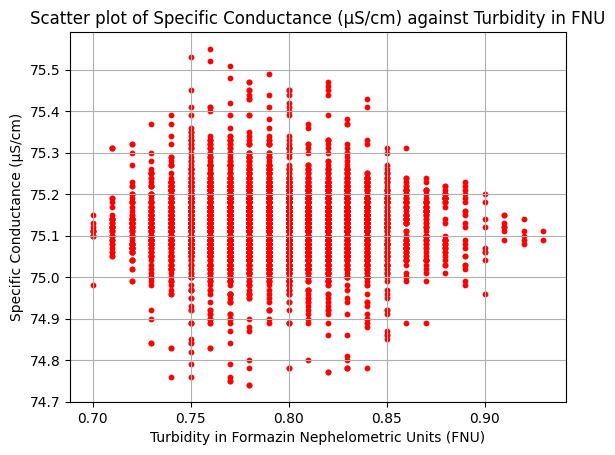

<Figure size 1500x1000 with 0 Axes>

In [11]:
scatter_plot(turbidity_nfu, conductivity,
             "Turbidity in Formazin Nephelometric Units (FNU)",
             "Specific Conductance (μS/cm)",
             "Scatter plot of Specific Conductance (μS/cm) against Turbidity in FNU")

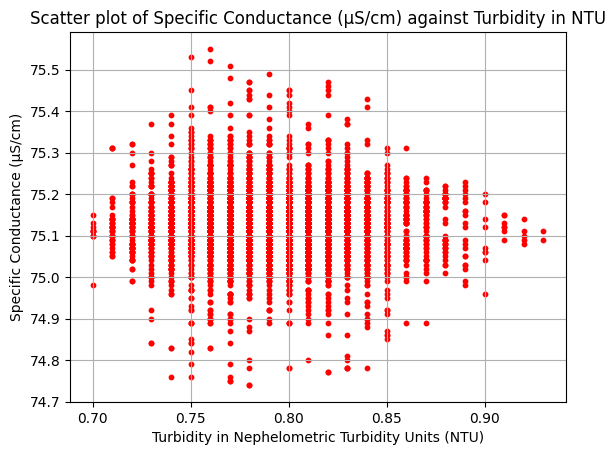

<Figure size 1500x1000 with 0 Axes>

In [12]:
scatter_plot(turbidity_ntu, conductivity,
             "Turbidity in Nephelometric Turbidity Units (NTU)",
             "Specific Conductance (μS/cm)",
             "Scatter plot of Specific Conductance (μS/cm) against Turbidity in NTU")

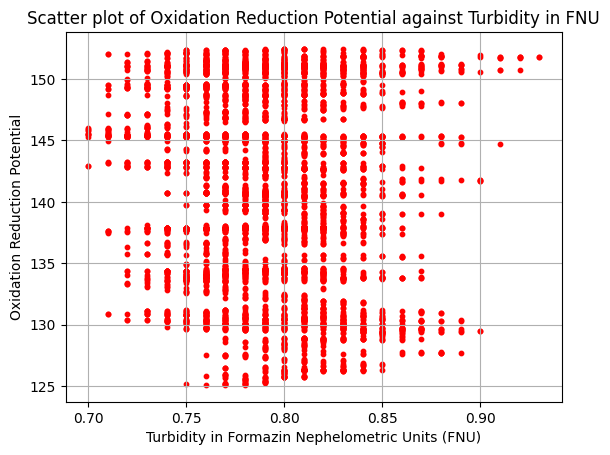

<Figure size 1500x1000 with 0 Axes>

In [13]:
#Question 4
oxidation_reduction_potential = data["field.orp"]
scatter_plot(turbidity_nfu, oxidation_reduction_potential,
             "Turbidity in Formazin Nephelometric Units (FNU)",
             "Oxidation Reduction Potential",
             "Scatter plot of Oxidation Reduction Potential against Turbidity in FNU")

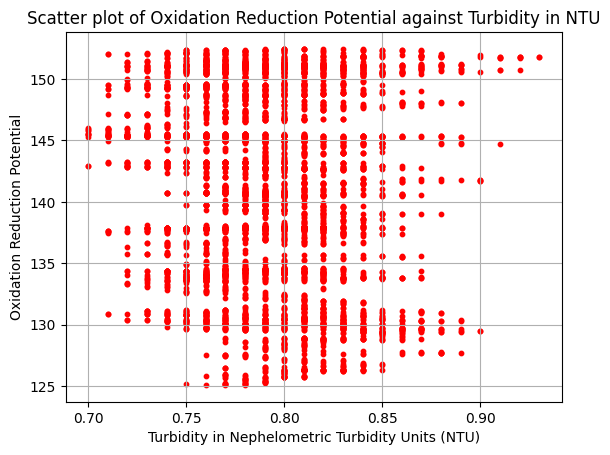

<Figure size 1500x1000 with 0 Axes>

In [14]:
# Question 4
oxidation_reduction_potential = data["field.orp"]
scatter_plot(turbidity_ntu, oxidation_reduction_potential,
             "Turbidity in Nephelometric Turbidity Units (NTU)",
             "Oxidation Reduction Potential",
             "Scatter plot of Oxidation Reduction Potential against Turbidity in NTU")

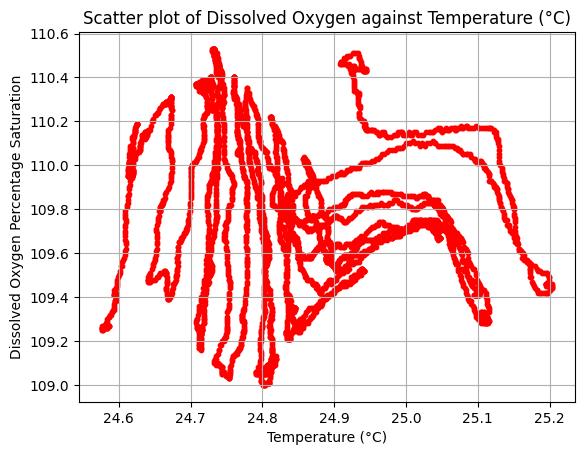

<Figure size 1500x1000 with 0 Axes>

In [15]:
# Question 5a
dissolved_oxygen_persat = data["field.odo_percsat"]
scatter_plot(temperature, dissolved_oxygen_persat,
             "Temperature (°C)",
             "Dissolved Oxygen Percentage Saturation",
             "Scatter plot of Dissolved Oxygen against Temperature (°C)")

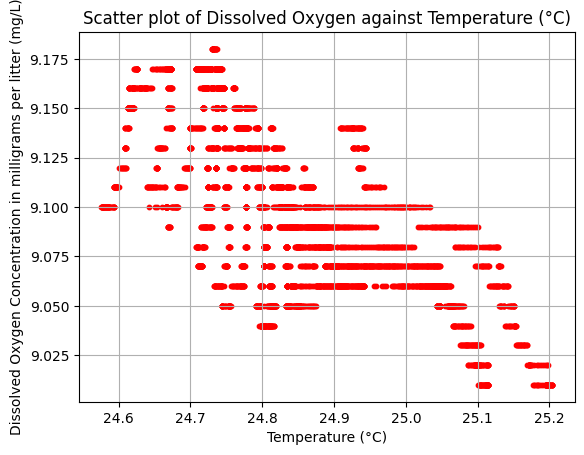

<Figure size 1500x1000 with 0 Axes>

In [16]:
# Question 5a
dissolved_oxygen_m = data["field.odo_m"]
scatter_plot(temperature, dissolved_oxygen_m,
             "Temperature (°C)",
             "Dissolved Oxygen Concentration in milligrams per litter (mg/L)",
             "Scatter plot of Dissolved Oxygen against Temperature (°C)")

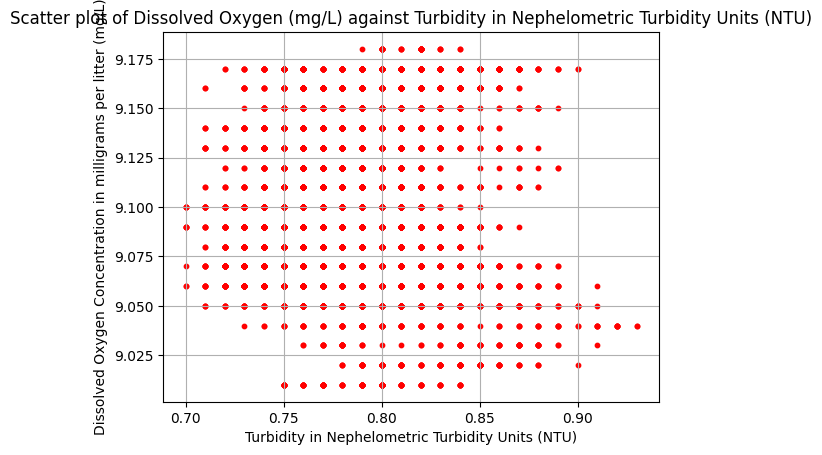

<Figure size 1500x1000 with 0 Axes>

In [17]:
# Question 5a
dissolved_oxygen_m = data["field.odo_m"]
scatter_plot(turbidity_ntu, dissolved_oxygen_m,
             "Turbidity in Nephelometric Turbidity Units (NTU)",
             "Dissolved Oxygen Concentration in milligrams per litter (mg/L)",
             "Scatter plot of Dissolved Oxygen (mg/L) against Turbidity in Nephelometric Turbidity Units (NTU)")

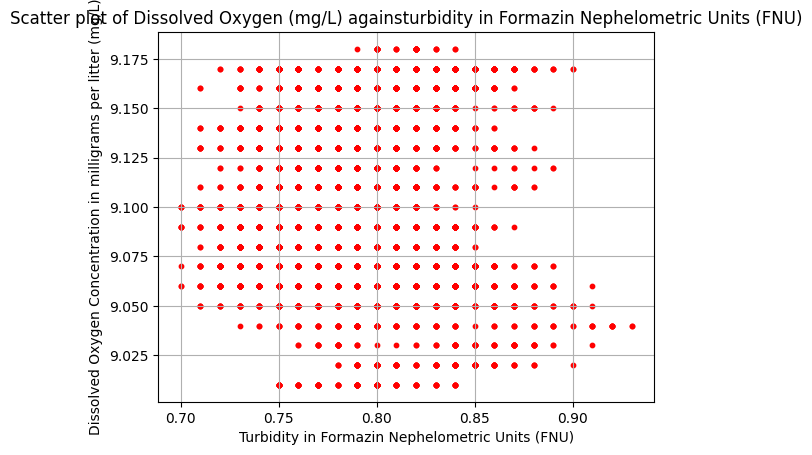

<Figure size 1500x1000 with 0 Axes>

In [18]:
# Question 5a
dissolved_oxygen_m = data["field.odo_m"]
scatter_plot(turbidity_nfu, dissolved_oxygen_m,
             "Turbidity in Formazin Nephelometric Units (FNU)",
             "Dissolved Oxygen Concentration in milligrams per litter (mg/L)",
             "Scatter plot of Dissolved Oxygen (mg/L) againsturbidity in Formazin Nephelometric Units (FNU)")

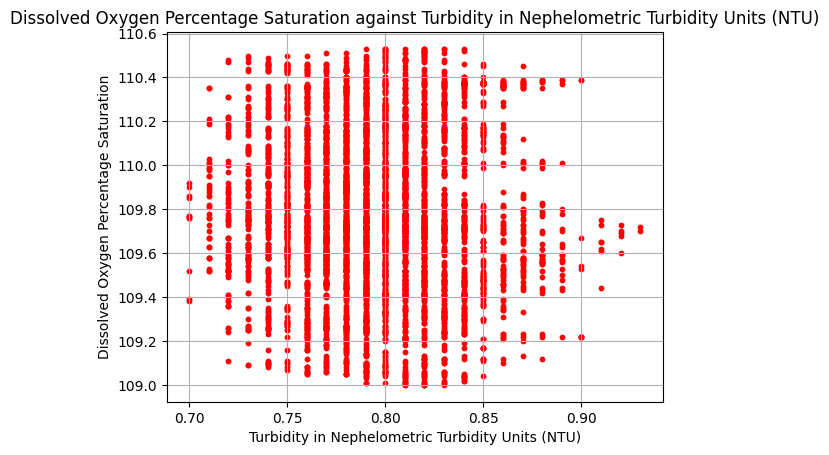

<Figure size 1500x1000 with 0 Axes>

In [19]:
# Question 5a
scatter_plot(turbidity_ntu, dissolved_oxygen_persat,
             "Turbidity in Nephelometric Turbidity Units (NTU)",
             "Dissolved Oxygen Percentage Saturation",
             "Dissolved Oxygen Percentage Saturation against Turbidity in Nephelometric Turbidity Units (NTU)")

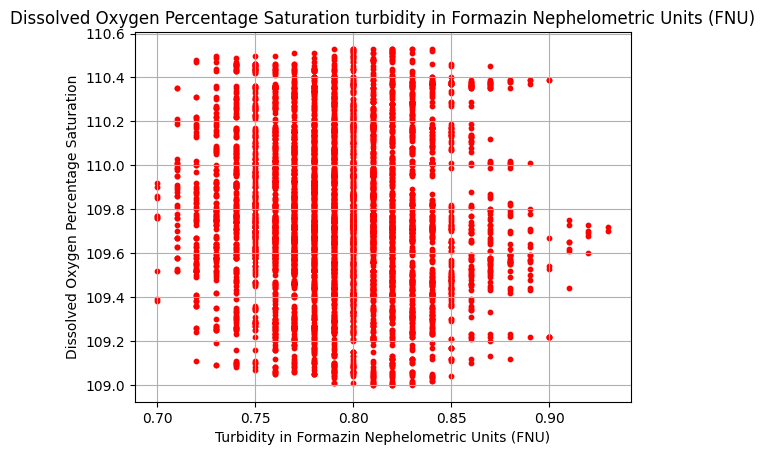

<Figure size 1500x1000 with 0 Axes>

In [20]:
# Question 5a
scatter_plot(turbidity_nfu, dissolved_oxygen_persat,
             "Turbidity in Formazin Nephelometric Units (FNU)",
             "Dissolved Oxygen Percentage Saturation",
             "Dissolved Oxygen Percentage Saturation turbidity in Formazin Nephelometric Units (FNU)")

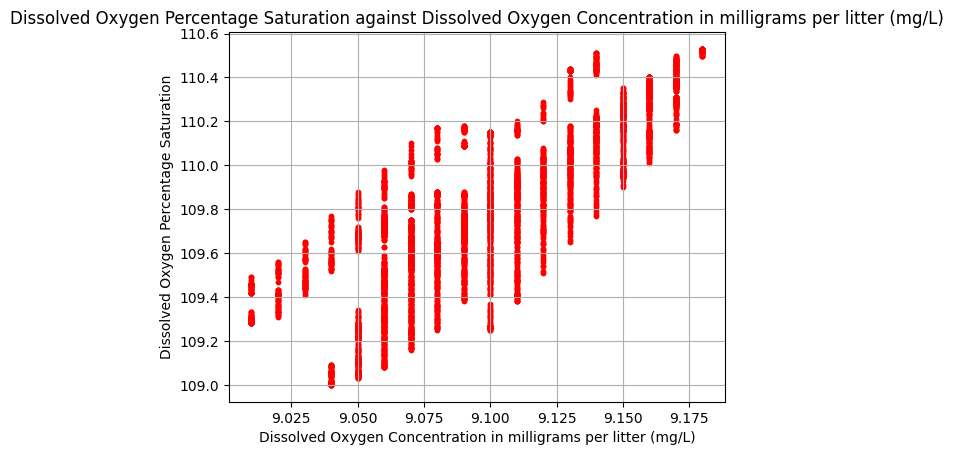

<Figure size 1500x1000 with 0 Axes>

In [21]:
# Question 6
scatter_plot(dissolved_oxygen_m, dissolved_oxygen_persat,
             "Dissolved Oxygen Concentration in milligrams per litter (mg/L)",
             "Dissolved Oxygen Percentage Saturation",
             "Dissolved Oxygen Percentage Saturation against Dissolved Oxygen Concentration in milligrams per litter (mg/L)")

In [22]:
data.corr()

,%time,field.header.seq,field.header.stamp,field.stamp_sonde,field.temp_c,field.spcond_u,field.sal,field.ph,field.orp,field.depth_m,field.turbidity_ntu,field.turbidity_fnu,field.odo_percsat,field.odo_m,field.latitude,field.longitude
%time,1.000000,1.000000,1.000000,1.000000,0.879808,-0.078646,NaN,-0.890496,0.987471,-0.819218,-0.092415,-0.092356,-0.081504,-0.565810,0.085366,0.998512
field.header.seq,1.000000,1.000000,1.000000,1.000000,0.879775,-0.078645,NaN,-0.890456,0.987431,-0.819191,-0.092398,-0.092339,-0.081334,-0.565668,0.085417,0.998507
field.header.stamp,1.000000,1.000000,1.000000,1.000000,0.879808,-0.078646,NaN,-0.890496,0.987471,-0.819218,-0.092415,-0.092356,-0.081504,-0.565810,0.085366,0.998512
field.stamp_sonde,1.000000,1.000000,1.000000,1.000000,0.879812,-0.078665,NaN,-0.890494,0.987469,-0.819213,-0.092420,-0.092360,-0.081519,-0.565824,0.085367,0.998513
field.temp_c,0.879808,0.879775,0.879808,0.879812,1.000000,-0.039491,NaN,-0.923911,0.887047,-0.683381,0.020881,0.020906,-0.165763,-0.694917,-0.238162,0.882724
field.spcond_u,-0.078646,-0.078645,-0.078646,-0.078665,-0.039491,1.000000,NaN,0.157645,-0.100978,0.103652,-0.028114,-0.028303,0.383919,0.301783,0.188438,-0.082950
field.sal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
field.ph,-0.890496,-0.890456,-0.890496,-0.890494,-0.923911,0.157645,NaN,1.000000,-0.931374,0.710098,0.006491,0.006424,0.335571,0.774561,0.219465,-0.895850
field.orp,0.987471,0.987431,0.987471,0.987469,0.887047,-0.100978,NaN,-0.931374,1.000000,-0.809476,-0.091305,-0.091231,-0.155333,-0.623705,0.041010,0.988144
field.depth_m,-0.819218,-0.819191,-0.819218,-0.819213,-0.683381,0.103652,NaN,0.710098,-0.809476,1.000000,0.068738,0.068630,0.196343,0.536280,-0.066832,-0.817063


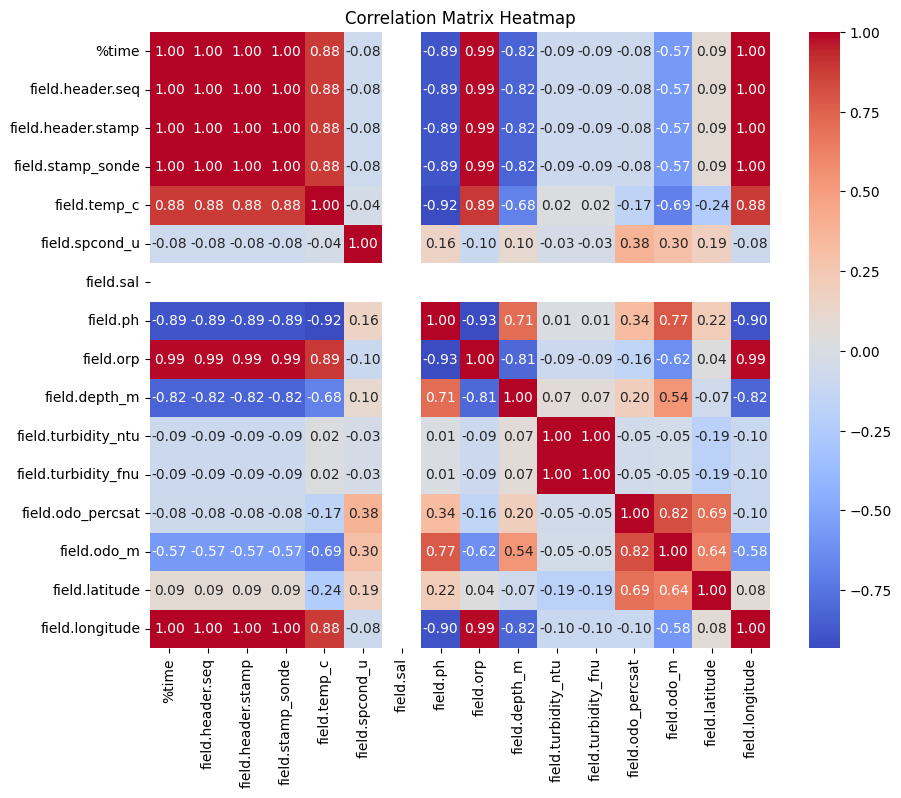

In [29]:
import seaborn as sns

# Compute the correlation matrix
correlation_matrix = data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed

# Create a heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [42]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Assuming 'data' is the DataFrame containing the dataset

# Creating a new DataFrame with renamed columns to handle special characters
renamed_columns = {
    'field.stamp_sonde': 'field_stamp_sonde',
    'field.temp_c': 'field_temp_c',
    'field.spcond_u': 'field_spcond_u',
    'field.ph': 'field_ph',
    'field.orp': 'field_orp',
    'field.depth_m': 'field_depth_m',
    'field.turbidity_ntu': 'field_turbidity_ntu',
    'field.odo_percsat': 'field_odo_percsat',
    'field.odo_m': 'field_odo_m',
    'field.latitude': 'field_latitude',
    'field.longitude': 'field_longitude'
}

# Creating a new DataFrame with renamed columns
data_renamed = data.rename(columns=renamed_columns)

# Selecting predictor variables (excluding 'field_odo_m')
predictors = [
    'field_stamp_sonde',
    'field_temp_c', 'field_spcond_u', 'field_ph', 'field_orp',
    'field_depth_m', 'field_odo_percsat',
    'field_latitude', 'field_longitude'
]

# Selecting target variable
target = 'field_odo_m'

# Dropping rows with missing values
data_renamed.dropna(subset=predictors + [target], inplace=True)

# Splitting the data into predictors (X) and target variable (y)
X = data_renamed[predictors]
y = data_renamed[target]

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Building the regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting on the test set
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Check coefficients to understand the impact of each predictor
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print(coefficients)
intercept = model.intercept_
print(f"Intercept: {intercept}")

Mean Squared Error: 8.367117998600006e-06
             Feature   Coefficient
0  field_stamp_sonde  7.212098e-16
1       field_temp_c -1.705226e-01
2     field_spcond_u  5.263107e-04
3           field_ph -1.947453e-02
4          field_orp -2.022716e-04
5      field_depth_m -5.425856e-02
6  field_odo_percsat  8.322529e-02
7     field_latitude  2.388705e-03
8    field_longitude -2.457427e-04
Intercept: -1100.2200639186606


In [41]:
# After model fitting and predictions...

# Calculate R-squared
r_squared = model.score(X_test, y_test)
print(f"R-squared: {r_squared}")

# Residual analysis
residuals = y_test - y_pred

R-squared: 0.9952789293968191
4235   -0.000198
798    -0.001529
2321    0.000833
3352   -0.000376
2304    0.001186
          ...   
2633    0.001517
4399    0.001870
328     0.000647
1572    0.003258
527     0.004289
Name: field_odo_m, Length: 903, dtype: float64


In [39]:
# Calculate the number of observations (n) and predictors (k)
n = len(X)  # Assuming X contains the predictors
k = len(predictors)  # Number of predictors used in the model


# Calculate adjusted R-squared using the formula
adjusted_r_squared = 1 - ((1 - r_squared) * (n - 1) / (n - k - 1))
print(f"Adjusted R-squared: {adjusted_r_squared}")

Adjusted R-squared: 0.9952694956411733
